### Import packages

In [1]:
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier

### Import Dataset: GoEmotions

In [2]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

### Create classes

In [3]:
positive_em = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
negative_em = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']
neutral_em = ['neutral']
ambiguous_em = ['curiosity', 'realization', 'surprise', 'confusion']

In [4]:
train_ds = dataset["train"]

positive = np.zeros(len(train_ds))
for i in positive_em:
    array = np.array(train_ds[i])
    positive = positive + array
    
negative = np.zeros(len(train_ds))
for i in negative_em:
    array = np.array(train_ds[i])
    negative = negative + array

neutral = np.array(train_ds['neutral'])

ambiguous = np.zeros(len(train_ds))
for i in ambiguous_em:
    array = np.array(train_ds[i])
    ambiguous = ambiguous + array
    

In [5]:
xpositive = np.array([1 if row > 0 else 0 for row in positive])
xnegative = np.array([1 if row > 0 else 0 for row in negative])
xambiguous = np.array([1 if row > 0 else 0 for row in ambiguous])
xneutral = np.array([1 if row > 0 else 0 for row in neutral])

add_sentiment = xpositive + xnegative + xambiguous + xneutral

remove_indices = [i for i, x in enumerate(add_sentiment) if x > 1]
keep_indices = [i for i, x in enumerate(add_sentiment) if x < 2]

In [6]:
positive = np.array([1 if row > 0 else 0 for row in positive])
negative = np.array([-1 if row > 0 else 0 for row in negative])
ambiguous = np.array([2 if row > 0 else 0 for row in ambiguous])
neutral = np.array([0 if row > 0 else 0 for row in neutral])

sentiment = positive + negative + ambiguous + neutral
sentiment = [i for j, i in enumerate(sentiment) if j not in remove_indices]


In [7]:
new_dataset = train_ds.map(remove_columns=['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'excitement', 'sadness','admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'surprise','neutral'])
new_dataset = new_dataset.select(keep_indices)
new_dataset = new_dataset.add_column("sentiment",sentiment)

In [8]:
import pandas as pd
# Change into a dataset to clean and tokenise data
data = pd.DataFrame(new_dataset)

data = data.rename(columns={"text":"review"})

In [9]:
data = data.drop(6224)
data = data.drop(15781)
data = data.drop(18668)
data = data.drop(25030)
data = data.drop(59237)
data = data.drop(62391)
data = data.drop(79941)
data = data.drop(82032)
data = data.drop(83339)
data = data.drop(102564)
data = data.drop(112052)
data = data.drop(121557)
data = data.drop(135426)
data = data.drop(158284)
data = data.drop(163029)
data = data.drop(164737)
data = data.drop(164752)
data = data.drop(180516)

### Clean text data:

In [10]:
y_train = data['sentiment']
x_train = data.drop(["sentiment"], axis=1)

In [11]:
# Import list of stopwords from library NLTK
from nltk.corpus import stopwords

stopwords_list = set(stopwords.words("english"))

# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)

In [12]:
# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# function that receive a list of words and do lemmatization:
def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text

In [13]:
import re
re_negation = re.compile("n't ")

# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

In [14]:
# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup 

def review_to_words(raw_review):
    raw_review = re.sub("<", " ", raw_review)
    
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text() 
    
    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(review_text)
    
    # 3. Remove non-letters and non-numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text) 
    
     # 4. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())                             
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]   
    
    # 6. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words)) 

In [15]:
# We get the text of reviews in the training set
reviews = x_train['review']

# We initialize an empty list to add the clean reviews
cleaned_train_reviews = []

# We loop over each review and clean it  
for i in reviews:
    cleaned_train_reviews.append(review_to_words(i))

### Tokenisation

In [16]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer(max_features=20000, ngram_range = (1,2))

# Create the training set with the words encoded as features of the reviews
train_data_features = vectorizer.fit_transform(cleaned_train_reviews)

print(train_data_features.shape)

(197026, 20000)


### Train-test split

In [17]:
# We split train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y_train, test_size=0.2, random_state=42)

### Logistic regression:

In [18]:
from sklearn.linear_model import LogisticRegression
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='saga',
                            multi_class='multinomial')

In [21]:
model = LogisticRegression(solver='saga')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5872963508095214


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='saga')
model.fit(X_train, y_train)

from sklearn import metrics
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('Logistic Regression model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

Logistic Regression model accuracy is 58.73%
------------------------------------------------
Confusion Matrix:
      0     1      2    3
0  5223  2685   1052  218
1  2046  6687   2588  386
2  1027  2758  10433  221
3   665  1871    745  801
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.57      0.58      9178
           0       0.48      0.57      0.52     11707
           1       0.70      0.72      0.71     14439
           2       0.49      0.20      0.28      4082

    accuracy                           0.59     39406
   macro avg       0.56      0.51      0.52     39406
weighted avg       0.59      0.59      0.58     39406



In [26]:
report = classification_report(y_test, predicted, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(['accuracy','macro avg','weighted avg'])
df_report = df_report.drop(columns=['support'])
df_report = df_report.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F-measure'})
df_report.insert(0, 'Class', ['Negative','Neutral','Positive','Ambiguous'])


display(df_report)

,Class,Precision,Recall,F-measure
-1,Negative,0.582859,0.569078,0.575886
0,Neutral,0.477609,0.571197,0.520227
1,Positive,0.704076,0.722557,0.713197
2,Ambiguous,0.492620,0.196227,0.280659


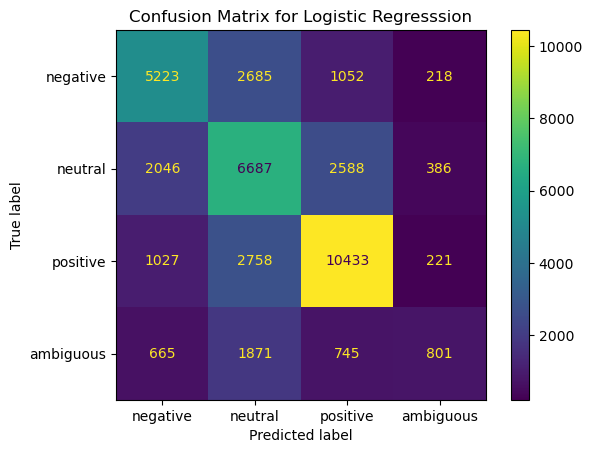

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,display_labels=['negative','neutral','positive','ambiguous'],values_format='d') 
plt.title("Confusion Matrix for Logistic Regresssion")
plt.show()


# plt.savefig('LR_confusionmatrix.png')